## I am using the Canadian Car Accidents  data from year 1994-2014 from www.kaggle.com. The following are the columns name in the data set
##### C_YEAR  - Year                                         
#####  V_ID - Vehicle Sequence number
#####  V_TYPE - Vehicle Type
#####  V_YEAR - Vehicle model Year
#####  P_ID - Person Sequemce number
#####  P_SEX - Person sex
#####  P_AGE - Person age
#####  P_PSN - Person Position
#####  P_ISEV - Medical Treatment Required
##### P_SAFE - Safety device used
##### P_USER - Road user Class
#####  C_TRAF - Traffic Control
##### C_MNTH - Month
#####  C_WDAY - Day of week
#####  C_HOUR - Collison hour
#####  C_SEV - Collison Severity
#####  C_VEHS - Number of Vehicles involved in collison
#####  C_CONF - Collison configuration
#####  C_RCFG - Roadway configuration
#####  C_WTHR - Weather Condition
#####  C_RSUR -  Road Surface
#####  C_RALN - Road Alignment




In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.cluster import KMeans    # for k-means clustering


from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-white')

In [48]:
df = pd.read_csv('project.csv')

df.head()


/opt/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,2,34,UU,1,5,...,1,6,1990,1,M,41,11,1,UU,1
1,1999,1,1,20,2,2,34,UU,1,5,...,2,1,1987,1,M,19,11,1,UU,1
2,1999,1,1,20,2,2,34,UU,1,5,...,2,1,1987,2,F,20,13,2,2,2
3,1999,1,1,8,2,1,1,UU,5,3,...,1,1,1986,1,M,46,11,1,UU,1
4,1999,1,1,8,2,1,1,UU,5,3,...,99,NN,NNNN,1,M,5,99,2,UU,3


In [49]:
df.tail()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
1048570,2001,7,5,15,2,2,36,2,1,1,...,2,1,1994,2,M,23,13,1,2,2
1048571,2001,7,5,16,2,2,35,1,1,1,...,1,1,1994,1,M,49,11,1,2,1
1048572,2001,7,5,16,2,2,35,1,1,1,...,1,1,1994,2,M,40,13,1,2,2
1048573,2001,7,5,16,2,2,35,1,1,1,...,2,14,1983,1,F,33,11,2,9,5
1048574,2001,7,5,11,2,2,21,1,1,1,...,1,1,1997,1,F,46,11,1,2,1


# Clustering

## I am using the number of car crashes and weather

### C_Weather
#### Code      Description 
#### 1         Clear and sunny
#### 2         Overcast, cloudy but no precipitation
#### 3         Raining
#### 4         Snowing, not including drifting snow
#### 5         Freezing rain, sleet, hail
#### 6         Visibility limitation e.g. drifting snow, fog, smog, dust, smoke, mist
#### 7         Strong wind
#### 8        Choice is other than the preceding values
#### 9         Unknown
#### 10         Jurisdiction does not provide this data element

### K-Means Clustering

### I am using two variable named as C_VEHS and C_WTHR

In [50]:
df = df[['C_VEHS', 'C_WTHR']]
df.head()

,C_VEHS,C_WTHR
0,2,1
1,2,1
2,2,1
3,1,5
4,1,5


### Scaling the features of the data set used

In [51]:
df = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
print (df)

           C_VEHS    C_WTHR
0       -0.016831 -0.499929
1       -0.016831 -0.499929
2       -0.016831 -0.499929
3       -0.099927  2.331857
4       -0.099927  2.331857
5        0.066265 -0.499929
6        0.066265 -0.499929
7        0.066265 -0.499929
8        0.066265 -0.499929
9       -0.099927 -0.499929
10      -0.099927 -0.499929
11      -0.016831  0.915964
12      -0.016831  0.915964
13      -0.099927 -0.499929
14      -0.099927 -0.499929
15      -0.016831 -0.499929
16      -0.016831 -0.499929
17      -0.016831 -0.499929
18      -0.016831 -0.499929
19      -0.016831 -0.499929
20      -0.016831 -0.499929
21      -0.016831 -0.499929
22      -0.016831 -0.499929
23      -0.016831 -0.499929
24      -0.016831 -0.499929
25      -0.016831 -0.499929
26      -0.016831 -0.499929
27      -0.016831 -0.499929
28      -0.099927  0.915964
29      -0.016831 -0.499929
...           ...       ...
1048545 -0.016831 -0.499929
1048546 -0.016831 -0.499929
1048547 -0.016831 -0.499929
1048548 -0.099927 -0

### Scatter Plot C_VEHS vs C_WTHR

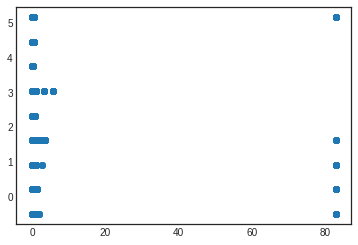

In [52]:
plt.figure()
plt.scatter(df['C_VEHS'], df['C_WTHR'] )
plt.show()

### K-means with K = 2

In [53]:
k1 = KMeans(n_clusters=2, n_init=20)
k1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
k1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [91]:
pd.Series(k1.labels_).value_counts()

0    1048424
1        151
dtype: int64

### K = 3

In [55]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
pd.Series(km2.labels_).value_counts()

0    838570
2    209854
1       151
dtype: int64

In [57]:
km2.cluster_centers_

array([[-1.28639773e-02, -4.12303022e-01],
       [ 8.29132361e+01,  6.34660680e-01],
       [-8.25599307e-03,  1.64709327e+00]])

In [58]:
km2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### It is just summing up the nearest clusters samples

In [59]:
km2.inertia_

347002.7822911671

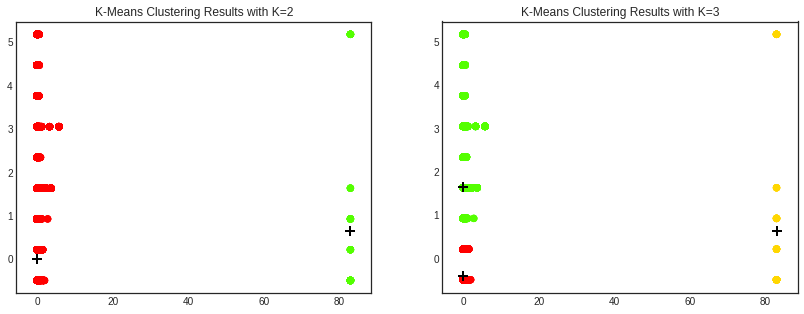

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(df['C_VEHS'], df['C_WTHR'], s=40, c=k1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(k1.cluster_centers_[:,0], k1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(df['C_VEHS'], df['C_WTHR'], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

## Logistic Regression

### For Logistic and Linear Regression I have used the knowlegde and material that I have covered in COMP381 class.

In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
plt.style.use('seaborn-white')

In [62]:
project = pd.read_csv('project.csv')
project.head()

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,2,34,UU,1,5,...,1,6,1990,1,M,41,11,1,UU,1
1,1999,1,1,20,2,2,34,UU,1,5,...,2,1,1987,1,M,19,11,1,UU,1
2,1999,1,1,20,2,2,34,UU,1,5,...,2,1,1987,2,F,20,13,2,2,2
3,1999,1,1,8,2,1,1,UU,5,3,...,1,1,1986,1,M,46,11,1,UU,1
4,1999,1,1,8,2,1,1,UU,5,3,...,99,NN,NNNN,1,M,5,99,2,UU,3


### Training data

In [63]:
proejct_train = smarket[0:52287]

X_train = proejct_train[['C_VEHS','C_WTHR']]
y_train = proejct_train['P_AGE']


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Coefficients for the both data sets

In [64]:
print(X_train.columns.values)
print(logreg.coef_)

['C_VEHS' 'C_WTHR']
[[-1.10527949e-01  3.42838142e-02]
 [-9.19012687e-02 -6.58907017e-02]
 [-1.50525205e-01 -8.11784479e-04]
 [-8.50709143e-02 -1.20872271e-02]
 [-1.53881417e-01 -2.30825843e-02]
 [-2.86061541e-01 -1.57207783e-02]
 [-3.78539033e-01  2.24019537e-03]
 [-2.66675863e-01 -7.83722370e-02]
 [-3.96962472e-01 -1.97801751e-01]
 [-1.26048741e-01 -1.54685921e-02]
 [-3.75928277e-01  1.63914356e-04]
 [-4.11800786e-01 -2.81361250e-02]
 [-5.01468175e-01 -3.28655976e-03]
 [-6.91899172e-01 -2.11322425e-02]
 [-5.61219057e-01 -3.79901500e-02]
 [-4.41048812e-01 -8.92775062e-03]
 [-2.93961665e-01 -3.54673664e-02]
 [-1.88199485e-01 -1.19592618e-02]
 [-1.51549349e-01 -1.85230635e-02]
 [-7.04400329e-02 -2.55141646e-02]
 [-7.10700939e-02  1.13051143e-02]
 [-6.55451421e-02  2.38449591e-02]
 [-3.45556628e-03  1.86792886e-02]
 [-1.00732948e-02  7.87422256e-03]
 [ 2.02242802e-03 -5.82212169e-03]
 [-6.21004609e-03 -1.04915033e-02]
 [-1.60508874e-03  2.25871869e-02]
 [ 2.15286512e-03  1.81405798e-02]


### Testing data

In [65]:
project_test = project[52287:1048574]

X_test = project_test[[ 'C_VEHS','C_WTHR']]
y_test = project_test['P_AGE']


preds = logreg.predict(X_test)
conf = confusion_matrix(y_test, preds)
print(logreg.classes_)
print(conf)

acc = accuracy_score(y_test, preds)
print('accuracy is: ', acc)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  97  99 100]
[[    0     0     0 ...     0     0  5642]
 [    0     0     0 ...     0     0  4502]
 [    0     0     0 ...     0     0  4685]
 ...
 [    0     0     0 ...     0     0    40]
 [    0     0     0 ...     0     0    35]
 [    0     0     0 ...     0     0 61603]]
accuracy is:  0.06183258438582457


### Probabilty predications

In [124]:
preds = logreg.predict_proba(X_test)
classes = logreg.classes_

threshold = 0.9
newpreds = []
for p in preds:
    if p[0] > threshold:
        newpreds.append(classes[0])
    else:
        newpreds.append(classes[1])

print(logreg.classes_)        
conf = confusion_matrix(y_test, newpreds)
print(conf)

acc = accuracy_score(y_test, newpreds)
print('accuracy is: ', acc)

[False  True]
[[515943   1357]
 [     0   6988]]
accuracy is:  0.9974117279052734


In [112]:
threshold = 0.5

newpreds = []
for p in preds:
    if p[0] > threshold:
        newpreds.append(classes[0])
    else:
        newpreds.append(classes[1])

print(logreg.classes_)        
conf = confusion_matrix(y_test, newpreds)
print(conf)

acc = accuracy_score(y_test, newpreds)
print('accuracy is: ', acc)

[False  True]
[[517300      0]
 [     0   6988]]
accuracy is:  1.0


In [115]:
precision_recall_fscore_support(y_test, newpreds, pos_label='Yes', average='micro')

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1045: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


(1.0, 1.0, 1.0, None)

In [116]:
p_pred = [p[0] for p in preds] # probability of the positive class
pos_class = logreg.classes_[0]

# convert class labels to True or False
newlabs = (y_test == pos_class)


auc = roc_auc_score(newlabs, p_pred)
print(auc)

1.0


## Linear Regression

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
project = pd.read_csv('project.csv')
project.head()



/opt/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,2,34,UU,1,5,...,1,6,1990,1,M,41,11,1,UU,1
1,1999,1,1,20,2,2,34,UU,1,5,...,2,1,1987,1,M,19,11,1,UU,1
2,1999,1,1,20,2,2,34,UU,1,5,...,2,1,1987,2,F,20,13,2,2,2
3,1999,1,1,8,2,1,1,UU,5,3,...,1,1,1986,1,M,46,11,1,UU,1
4,1999,1,1,8,2,1,1,UU,5,3,...,99,NN,NNNN,1,M,5,99,2,UU,3


### Single Linear Regression

### I am using C_VEHS to  predict the C_WTHR

In [70]:
linmod = LinearRegression()
X = project['C_VEHS'].values[:, np.newaxis]

y = project['C_WTHR']

linmod.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
X_train = X[0:52287]
X_test = X[52287:]

y_train = y[0:52287]
y_test = y[52287:]

In [72]:
linmod2 = LinearRegression()
linmod2.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
print(linmod.intercept_)
print(linmod.coef_)

1.7038209670196154
[0.00106555]


### I am making predications and R-Squared

In [74]:
preds = linmod.predict(X)
rs = r2_score(y, preds)
print(rs)

8.241145390108784e-05


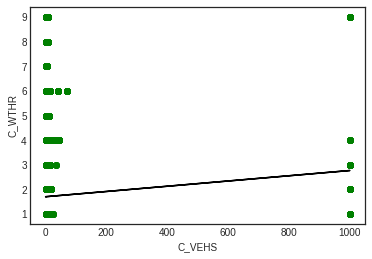

In [75]:
plt.scatter(X, y,color='g')
plt.plot(X, preds,color='k')
plt.xlabel('C_VEHS')
plt.ylabel('C_WTHR')
plt.show()

In [76]:
preds = linmod.predict(X_test)
print(preds)



[1.70595207 1.70595207 1.70595207 ... 1.70595207 1.70595207 1.70595207]


In [77]:
mse = mean_squared_error(y_test, preds)
print(mse)


1.936123179660111


### Comparing the value of predicted and actual value of Y

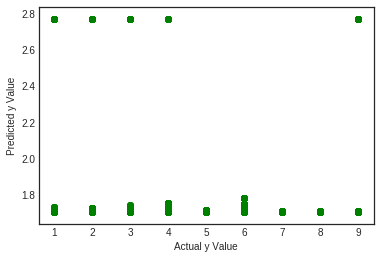

In [78]:
plt.scatter(y_test, preds,color='g')
plt.xlabel("Actual y Value")
plt.ylabel("Predicted y Value")
plt.show()

## Neural Networks

In [79]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_recall_fscore_support, accuracy_score

%matplotlib inline

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### In this I am creating a new value for the C_WTHR, I am looking if the C_WTHR has a value greater than 8, it will print true else false

In [80]:
df = pd.read_csv('project.csv')
df['High'] = df['C_WTHR'] > 8
df.C_MNTH= df.C_MNTH.map({'No':0, 'Yes':1})
df.head()

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,High
0,1999,NaN,1,20,2,2,34,UU,1,5,...,6,1990,1,M,41,11,1,UU,1,False
1,1999,NaN,1,20,2,2,34,UU,1,5,...,1,1987,1,M,19,11,1,UU,1,False
2,1999,NaN,1,20,2,2,34,UU,1,5,...,1,1987,2,F,20,13,2,2,2,False
3,1999,NaN,1,8,2,1,1,UU,5,3,...,1,1986,1,M,46,11,1,UU,1,False
4,1999,NaN,1,8,2,1,1,UU,5,3,...,NN,NNNN,1,M,5,99,2,UU,3,False


#### Here I am randommly dividing the data into 50% as training data

In [81]:
X = df.drop(['C_MNTH', 'C_WDAY' , 'High', 'C_HOUR', 'C_SEV', 'C_CONF', 'C_RCFG', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID', 'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'], axis=1)
y = df.High


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [82]:
X.head()

,C_YEAR,C_VEHS,C_WTHR,P_AGE
0,1999,2,1,41
1,1999,2,1,19
2,1999,2,1,20
3,1999,1,5,46
4,1999,1,5,5


In [83]:
nn = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, activation='relu', random_state=1)
perc = Perceptron(penalty='l1', random_state=1, max_iter=1000, shuffle=True)
logreg = LogisticRegression()
gb = GradientBoostingClassifier(random_state=1)

In [84]:
nn.fit(X_train, y_train)
perc.fit(X_train, y_train)
logreg.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

### Confusion marix based on the predications

In [85]:
preds_nn = nn.predict(X_test)
preds_perc = perc.predict(X_test)
preds_logreg = logreg.predict(X_test)
preds_gb = gb.predict(X_test)

In [86]:
cm_nn = pd.DataFrame(confusion_matrix(y_test, preds_nn).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Neural Network:\n")
print(cm_nn)

tree_acc = accuracy_score(y_test, preds_nn)
print('\nAccuracy is: %s' % tree_acc)

Using Neural Network:

         No   Yes
No   517233     0
Yes      67  6988

Accuracy is: 0.9998722076416016


In [87]:
cm_perc = pd.DataFrame(confusion_matrix(y_test, preds_perc).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using the Perceptron:\n")
print(cm_perc)

tree_acc = accuracy_score(y_test, preds_perc)
print('\nAccuracy is: %s' % tree_acc)

Using the Perceptron:

         No   Yes
No   517243     0
Yes      57  6988

Accuracy is: 0.9998912811279297


In [88]:
cm_logreg = pd.DataFrame(confusion_matrix(y_test, preds_logreg).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_logreg)

tree_acc = accuracy_score(y_test, preds_logreg)
print('\nAccuracy is: %s' % tree_acc)

Using Logistic Regression:

         No   Yes
No   517300     0
Yes       0  6988

Accuracy is: 1.0


In [89]:
cm_gb = pd.DataFrame(confusion_matrix(y_test, preds_gb).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_gb)

tree_acc = accuracy_score(y_test, preds_gb)
print('\nAccuracy is: %s' % tree_acc)

Using Logistic Regression:

         No   Yes
No   517300     0
Yes       0  6988

Accuracy is: 1.0
